In [1]:
from pybliometrics.scopus import ScopusSearch
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import display

In [34]:
import pybliometrics
pybliometrics.scopus.utils.create_config()

Creating config file at /Users/Patrice/.pybliometrics/config.ini with default paths...
Configuration file successfully created at /Users/Patrice/.pybliometrics/config.ini
For details see https://pybliometrics.rtfd.io/en/stable/configuration.html.


In [2]:
from pybliometrics.scopus.utils import config
print("keys : ", config['Authentication']['APIKey'])  # Show keys

keys :  1e634063406e6b444b503e8eedf16350, 5a6abf59175949d8c948473454822a57


In [2]:
# liste laboratoires INS2I avec affiliation ID
labID = (("CMP",60202650),("CRAN", 60073336),("CREATIS", 60062760),("CRIL", 60122762),("CRISTAL",60122064),("DI ENS", 60105786),("ETIS",60126116),("GIPSA-Lab",60104170),("GREYC",60122535),("G-SCOP",60108255),("HEUDIASYC",60160765),("I3S",60110719),("ICUBE",60208831),("IDRIS",60106146),("IRIF",60123660),("IRISA",60027031),("IRIT",60030491),("ISIR",60069769),("L2S",60007136),("LAAS",60005830),("LABRI",60106845),("LAB-STICC",60105670),("LAMIH",60193405),("LAMSADE",60105740),("LIG",60108044),("LIGM",60105097),("LIMOS",60121963),("LIP",60108310),("LIP6",60112307),("LIPN",60101355),("LIRIS",60108341),("LIRMM",60007853),("LIS",60210090),("LIMSI",60032709),("LRI",60106208),("LIX",60028952),("LORIA",60028850),("LS2N",60110511),("LSV",60105997),("MDLS",60106225),("STMS",60158039),("TIMA",60003462),("TIMC IMAG",60108275),("VERIMAG",60030409))
print(len(labID))
labID

44


(('CMP', 60202650),
 ('CRAN', 60073336),
 ('CREATIS', 60062760),
 ('CRIL', 60122762),
 ('CRISTAL', 60122064),
 ('DI ENS', 60105786),
 ('ETIS', 60126116),
 ('GIPSA-Lab', 60104170),
 ('GREYC', 60122535),
 ('G-SCOP', 60108255),
 ('HEUDIASYC', 60160765),
 ('I3S', 60110719),
 ('ICUBE', 60208831),
 ('IDRIS', 60106146),
 ('IRIF', 60123660),
 ('IRISA', 60027031),
 ('IRIT', 60030491),
 ('ISIR', 60069769),
 ('L2S', 60007136),
 ('LAAS', 60005830),
 ('LABRI', 60106845),
 ('LAB-STICC', 60105670),
 ('LAMIH', 60193405),
 ('LAMSADE', 60105740),
 ('LIG', 60108044),
 ('LIGM', 60105097),
 ('LIMOS', 60121963),
 ('LIP', 60108310),
 ('LIP6', 60112307),
 ('LIPN', 60101355),
 ('LIRIS', 60108341),
 ('LIRMM', 60007853),
 ('LIS', 60210090),
 ('LIMSI', 60032709),
 ('LRI', 60106208),
 ('LIX', 60028952),
 ('LORIA', 60028850),
 ('LS2N', 60110511),
 ('LSV', 60105997),
 ('MDLS', 60106225),
 ('STMS', 60158039),
 ('TIMA', 60003462),
 ('TIMC IMAG', 60108275),
 ('VERIMAG', 60030409))

In [3]:
labID = (("ISIR",60069769),("LIP",60108310),("MDLS",60106225))
print(len(labID))
labID

3


(('ISIR', 60069769), ('LIP', 60108310), ('MDLS', 60106225))

In [14]:
# !!!OBSOLETE
#Interrogation par AFFILORG
total = 0
for i in range(len(lab)):
    query='AFFILORG("'+lab[i]+'") AND PUBYEAR > 2015 AND PUBYEAR < 2021'
    li = ScopusSearch(query, verbose=True, download=True, subscriber=False)
    print(lab[i], ": Total : ", li.get_results_size())
    total += li.get_results_size()
    #print(li.results)
    df = pd.DataFrame(pd.DataFrame(li.results))
    print(df.groupby('subtypeDescription')['eid'].nunique())
print ("Total labo = ", total)


100%|██████████| 44/44 [00:41<00:00,  1.06it/s]


LIS : Total :  1052
subtypeDescription
Article             584
Book                  3
Book Chapter         38
Conference Paper    380
Editorial            17
Erratum               3
Letter                6
Note                  7
Review               14
Name: eid, dtype: int64



100%|██████████| 10/10 [00:08<00:00,  1.21it/s]


LIF : Total :  214
subtypeDescription
Article             103
Book                  1
Book Chapter          7
Conference Paper     98
Editorial             1
Letter                2
Review                2
Name: eid, dtype: int64



100%|██████████| 26/26 [00:27<00:00,  1.05s/it]

LSIS : Total :  608
subtypeDescription
Article             233
Book                  1
Book Chapter         17
Conference Paper    344
Editorial             4
Erratum               2
Review                6
Name: eid, dtype: int64
Total labo =  1874


## Récupération des listes de publications de chaque laboratoire
L'interrogation se fait selon l'identifiant d'affiliation (AF-ID).
Pour chaque laboratoire un fichier .csv est créé

In [4]:
#Interrogation par AF-ID
total = 0
for labo in labID:
    print(labo)
    query='AF-ID('+str(labo[1])+') AND PUBYEAR > 2015 AND PUBYEAR < 2021'
    #print (query)
    li = ScopusSearch(query, verbose=True, download=True, subscriber=False)
    print(labo[0], ": Total : ", li.get_results_size())
    total += li.get_results_size()
    #print(li.results)
    df = pd.DataFrame(pd.DataFrame(li.results))
    df.to_csv("Scopus/"+labo[0]+'.csv')
    print(df.groupby('subtypeDescription')['eid'].nunique())
print ("Total labo = ", total)

('ISIR', 60069769)


100%|██████████| 30/30 [00:30<00:00,  1.00s/it]


ISIR : Total :  707
subtypeDescription
Article             361
Book                  1
Book Chapter         27
Conference Paper    260
Editorial            10
Erratum               3
Letter                5
Note                  2
Review               33
Short Survey          5
Name: eid, dtype: int64
('LIP', 60108310)


100%|██████████| 29/29 [00:26<00:00,  1.10it/s]


LIP : Total :  694
subtypeDescription
Article             294
Book                  1
Book Chapter          7
Conference Paper    377
Editorial             8
Erratum               2
Review                4
Short Survey          1
Name: eid, dtype: int64
('MDLS', 60106225)


100%|██████████| 9/9 [00:07<00:00,  1.16it/s]

MDLS : Total :  196
subtypeDescription
Article             146
Book Chapter          2
Conference Paper     42
Editorial             1
Erratum               1
Review                4
Name: eid, dtype: int64
Total labo =  1597


In [6]:
def initStatsLabo ():
    npPublisLabo = list()
    for labo in labID:
        npPublisLabo.append({"nom":labo[0]})
    #print(npPublisLabo)
    global statsLabo
    statsLabo = pd.DataFrame(npPublisLabo)
    statsLabo.set_index('nom',inplace=True)
    statsLabo["Total"]=0
    statsLabo["Article"]=0
    statsLabo["Conference Paper"]=0
    statsLabo["Book"]=0
    statsLabo["Book Chapter"]=0
    statsLabo["Data Paper"]=0
    statsLabo["Editorial"]=0
    statsLabo["Erratum"]=0
    statsLabo["Letter"]=0
    statsLabo["Review"]=0
    statsLabo["Short Survey"]=0
    statsLabo["Note"]=0
    statsLabo["Retracted"]=0

In [7]:
initStatsLabo()
for labo in labID:
    df = pd.read_csv("Scopus/"+labo[0]+".csv")
    statsLabo.loc[labo[0],'Total'] = len(df)
    dataLabo = df.groupby('subtypeDescription')['eid'].count()
    for type in dataLabo.index:
        statsLabo.loc[labo[0],type]=dataLabo[type]
statsLabo

,Total,Article,Conference Paper,Book,Book Chapter,Data Paper,Editorial,Erratum,Letter,Review,Short Survey,Note,Retracted
nom,,,,,,,,,,,,,
CMP,47,35,10,0,1,0,0,0,0,1,0,0,0
CRAN,1303,607,548,2,49,0,22,6,7,52,6,4,0
CREATIS,869,524,273,0,7,0,8,3,14,24,10,3,3
CRIL,322,51,260,1,2,0,6,0,0,2,0,0,0
CRISTAL,1583,630,863,0,41,1,17,3,2,12,9,4,1
DI ENS,242,82,151,0,1,0,4,3,0,1,0,0,0
ETIS,432,152,267,0,4,0,3,1,0,4,0,1,0
GIPSA-Lab,1692,764,822,1,64,0,13,2,2,18,3,3,0
GREYC,546,229,297,0,8,0,8,1,0,1,0,1,0


In [8]:
statsParAnneeLabo = pd.DataFrame()
for labo in labID:
    df = pd.read_csv("Scopus/"+labo[0]+".csv")
    df.coverDate = pd.to_datetime(df.coverDate).dt.year
    anneeDebut = 2016
    anneeFin = 2020
    evolutionLabo = pd.DataFrame()
    for x in range(anneeDebut,anneeFin+1):
        data = {
            "Année" : [x],
            "Nom":labo[0],
            "Total" : [0],
            "Article" : [0],
            "Conference Paper" : [0],
            "Data Paper" : [0],
            "Book" : [0],
            "Book Chapter" : [0],
            "Editorial" : [0],
            "Erratum" : [0],
            "Letter" : [0],
            "Review" : [0],
            "Short Survey" : [0],
            "Note" : [0],
            "Retracted" : [0]
        }
        evolutionLabo = pd.concat([evolutionLabo, pd.DataFrame(data)], ignore_index=True)
    evolutionLabo.set_index(['Année'], inplace=True)
    dataLabo = df.groupby(['coverDate','subtypeDescription'])['coverDate'].count()
    for index, valeur in dataLabo.iteritems():
        evolutionLabo.loc[index[0],index[1]]=valeur
        evolutionLabo.loc[index[0],"Total"]+=valeur
    statsParAnneeLabo = pd.concat([statsParAnneeLabo, evolutionLabo])
display(statsParAnneeLabo)

,Nom,Total,Article,Conference Paper,Data Paper,Book,Book Chapter,Editorial,Erratum,Letter,Review,Short Survey,Note,Retracted
Année,,,,,,,,,,,,,,
2016,CMP,13,10,2,0,0,1,0,0,0,0,0,0,0
2017,CMP,16,10,6,0,0,0,0,0,0,0,0,0,0
2018,CMP,12,10,1,0,0,0,0,0,0,1,0,0,0
2019,CMP,3,2,1,0,0,0,0,0,0,0,0,0,0
2020,CMP,3,3,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,VERIMAG,105,44,56,0,0,2,1,0,1,1,0,0,0
2017,VERIMAG,68,32,32,0,0,4,0,0,0,0,0,0,0
2018,VERIMAG,61,16,38,0,0,4,3,0,0,0,0,0,0


In [9]:
statsParAnneeLabo.to_csv("Scopus/StatsParAnnee.csv")

In [10]:
statsParAnneeLabo = pd.read_csv("Scopus/StatsParAnnee.csv", index_col=0)

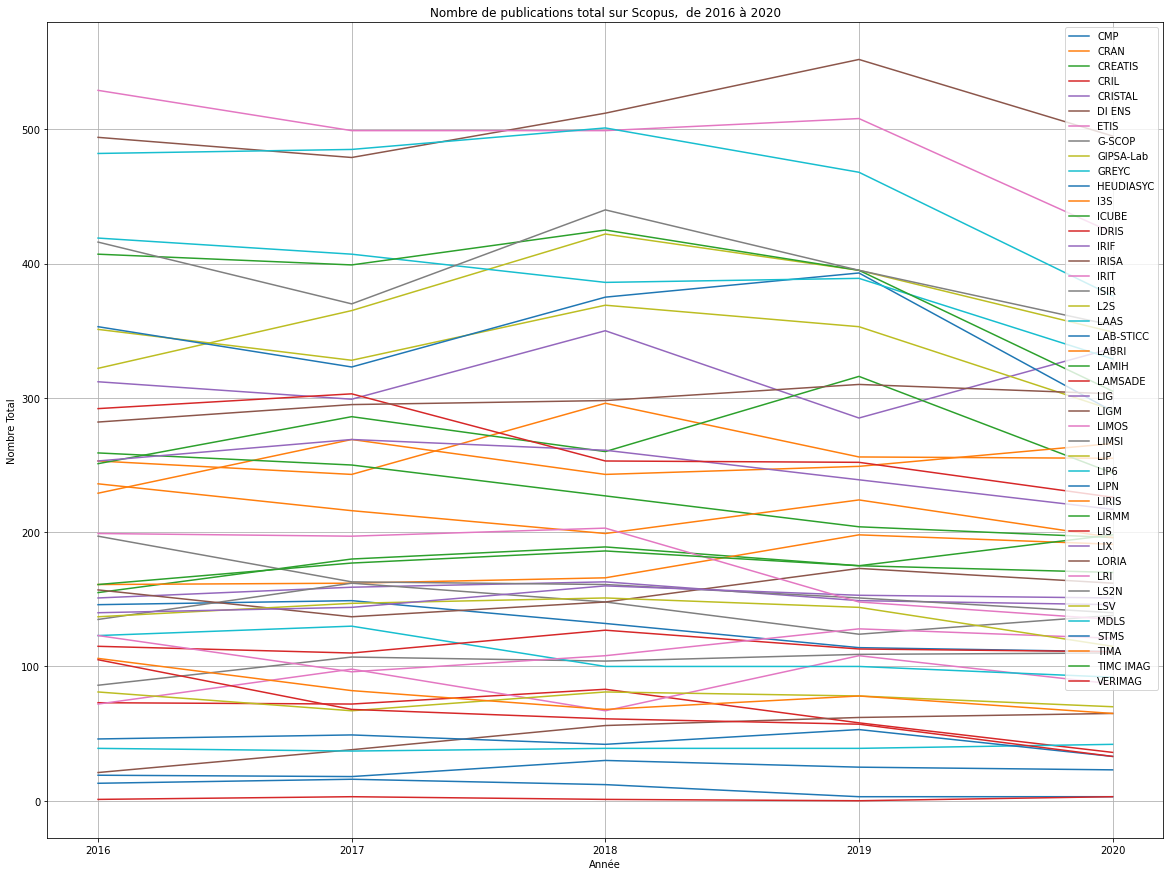

In [11]:
statsParAnneeLabo.groupby('Nom')['Total'].plot(title='Nombre de publications total sur Scopus,  de 2016 à 2020',figsize=(20,15))
plt.xticks(np.arange(2016,2021,step=1))
plt.ylabel("Nombre Total")
plt.legend()
plt.grid(True)

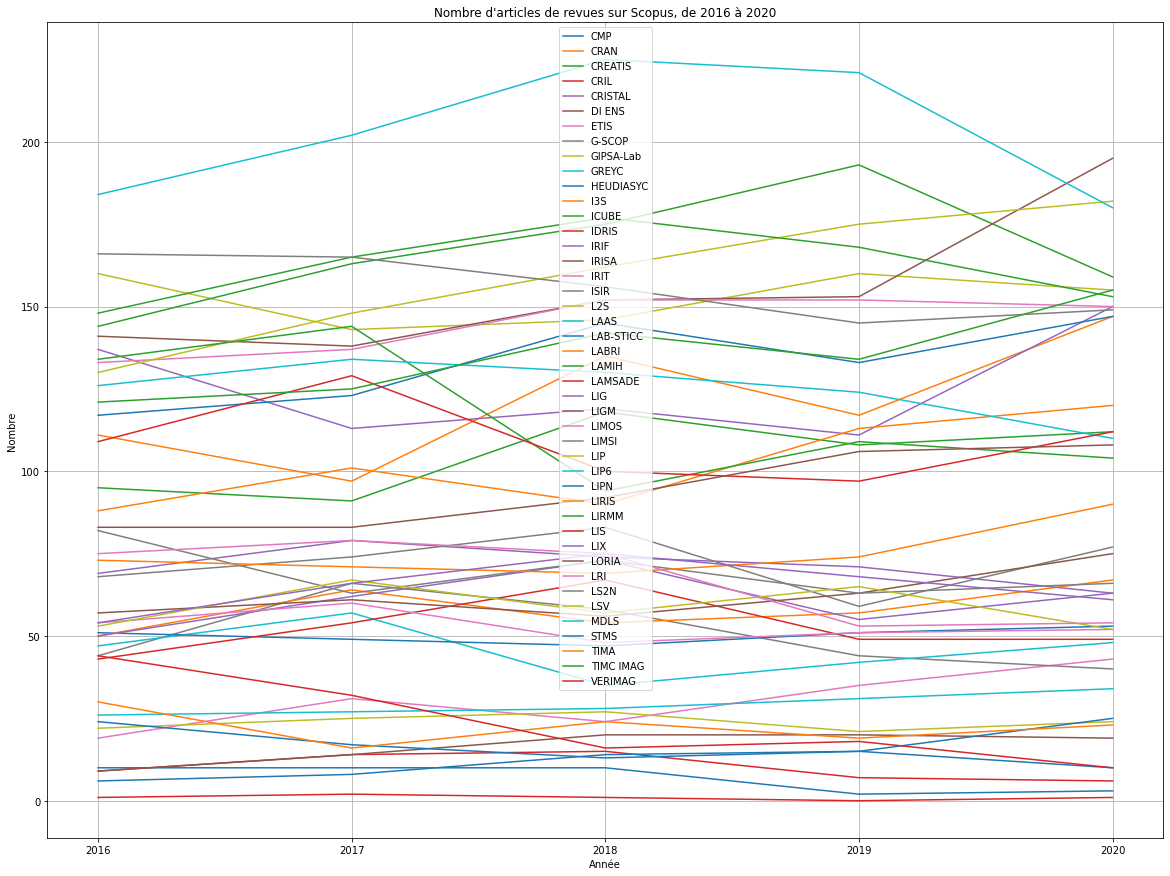

In [12]:
statsParAnneeLabo.groupby('Nom')['Article'].plot(title="Nombre d'articles de revues sur Scopus, de 2016 à 2020",figsize=(20,15))
plt.xticks(np.arange(2016,2021,step=1))
plt.ylabel("Nombre")
plt.legend()
plt.grid(True)

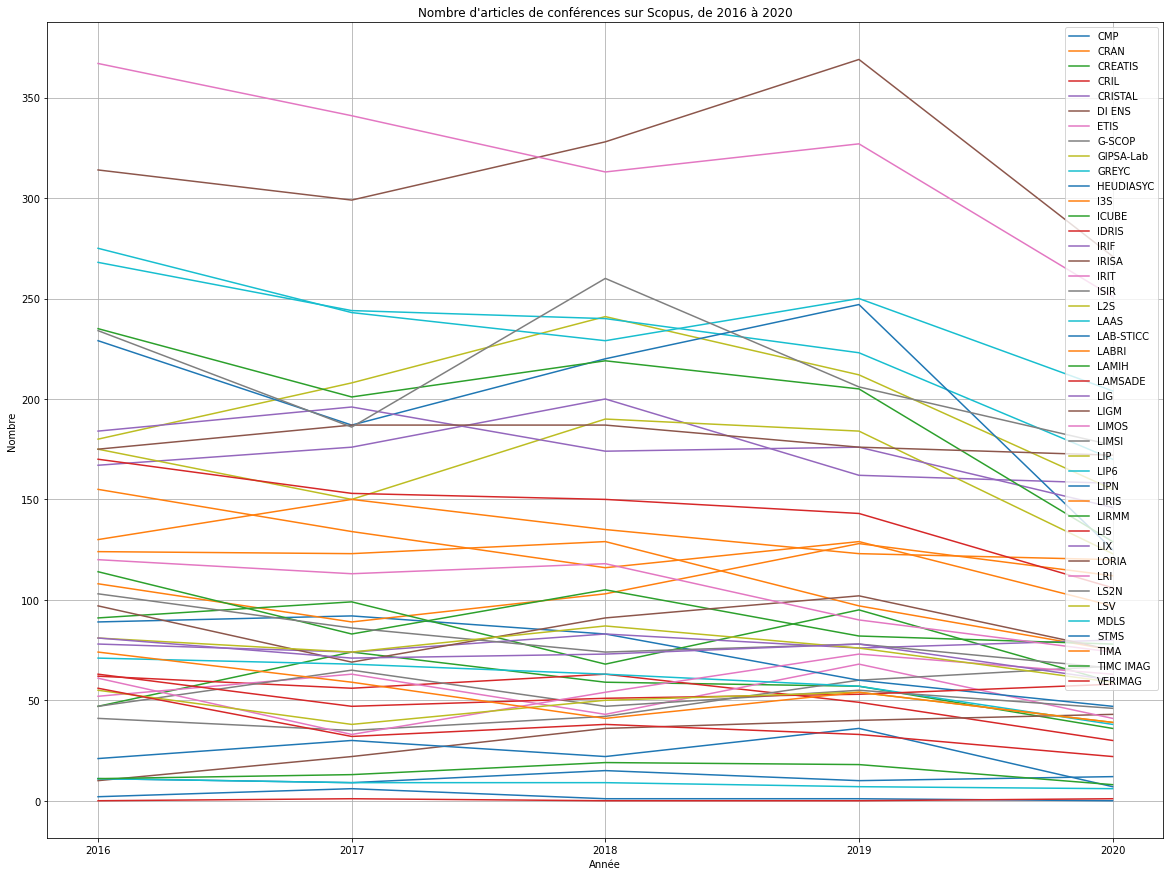

In [14]:
statsParAnneeLabo.groupby('Nom')['Conference Paper'].plot(title="Nombre d'articles de conférences sur Scopus, de 2016 à 2020",figsize=(20,15))
plt.xticks(np.arange(2016,2021,step=1))
plt.ylabel("Nombre")
plt.legend()
plt.grid(True)

In [16]:
statsPourPivot = statsParAnneeLabo.reset_index(inplace=False)
ins2iTotalPubli = statsPourPivot.pivot(index="Nom", columns=["Année"], values='Total')
display(ins2iTotalPubli)

Année,2016,2017,2018,2019,2020
Nom,,,,,
CMP,13,16,12,3,3
CRAN,253,243,296,256,255
CREATIS,155,180,189,175,170
CRIL,73,72,83,58,36
CRISTAL,312,299,350,285,337
DI ENS,21,38,56,62,65
ETIS,72,98,67,108,87
G-SCOP,86,107,104,109,110
GIPSA-Lab,351,328,369,353,291


In [17]:
statsPourPivot = statsParAnneeLabo.reset_index(inplace=False)
ins2iNbART = statsPourPivot.pivot(index="Nom", columns=["Année"], values='Article')
display(ins2iNbART)

Année,2016,2017,2018,2019,2020
Nom,,,,,
CMP,10,10,10,2,3
CRAN,111,97,135,117,147
CREATIS,95,91,118,108,112
CRIL,9,14,15,7,6
CRISTAL,137,113,119,111,150
DI ENS,9,14,20,20,19
ETIS,19,31,24,35,43
G-SCOP,44,66,58,44,40
GIPSA-Lab,160,143,146,160,155


In [18]:
statsPourPivot = statsParAnneeLabo.reset_index(inplace=False)
ins2iNbConferences = statsPourPivot.pivot(index="Nom", columns=["Année"], values='Conference Paper')
display(ins2iNbART)

Année,2016,2017,2018,2019,2020
Nom,,,,,
CMP,10,10,10,2,3
CRAN,111,97,135,117,147
CREATIS,95,91,118,108,112
CRIL,9,14,15,7,6
CRISTAL,137,113,119,111,150
DI ENS,9,14,20,20,19
ETIS,19,31,24,35,43
G-SCOP,44,66,58,44,40
GIPSA-Lab,160,143,146,160,155


In [19]:
ins2i = statsParAnneeLabo.groupby('Année').sum()
display(ins2i)

,Total,Article,Conference Paper,Data Paper,Book,Book Chapter,Editorial,Erratum,Letter,Review,Short Survey,Note,Retracted
Année,,,,,,,,,,,,,
2016,8902,3397,5039,0,9,178,138,5,22,86,18,10,0
2017,8853,3569,4688,2,7,262,152,11,23,107,16,13,3
2018,9102,3646,4869,2,14,234,160,12,18,128,12,6,1
2019,8898,3567,4819,2,8,186,143,21,24,102,18,8,0
2020,8003,3696,3745,4,4,182,118,31,30,157,19,16,1


Text(0, 0.5, 'Nombre total')

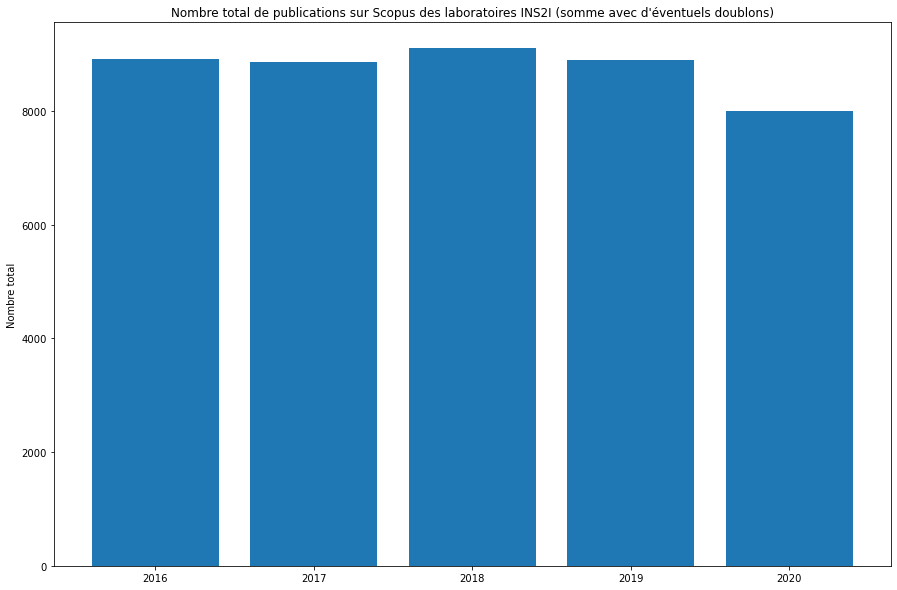

In [20]:
plt.figure(figsize=(15,10))
plt.bar(ins2i.index,ins2i['Total'])
plt.title("Nombre total de publications sur Scopus des laboratoires INS2I (somme avec d'éventuels doublons)")
plt.xticks(np.arange(2016,2021,step=1))
plt.ylabel("Nombre total")

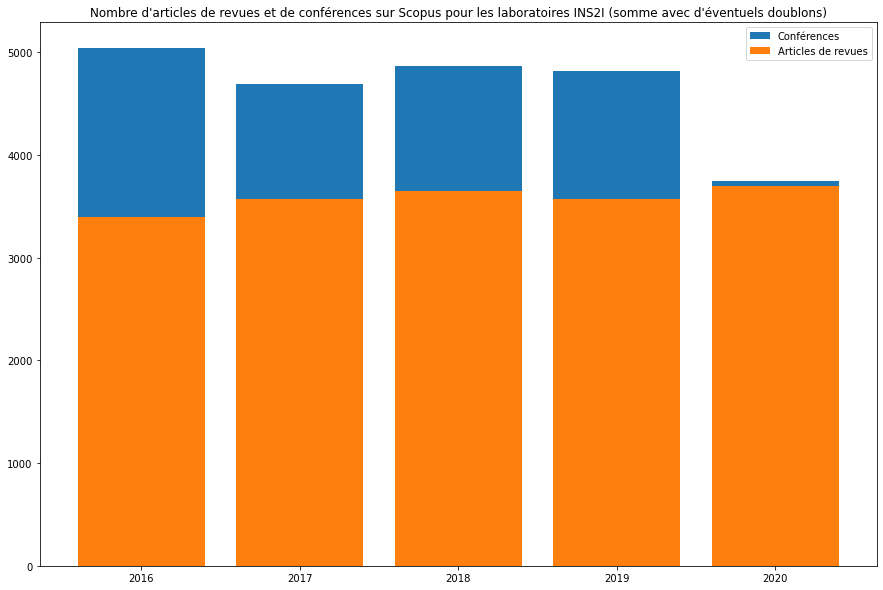

In [21]:
plt.figure(figsize=(15,10))
plt.title("Nombre d'articles de revues et de conférences sur Scopus pour les laboratoires INS2I (somme avec d'éventuels doublons)")
b1 = plt.bar(ins2i.index,ins2i['Conference Paper'])
b2 = plt.bar(ins2i.index,ins2i['Article'])
plt.legend([b1,b2], ['Conférences','Articles de revues'])

In [7]:
from pybliometrics.scopus import AuthorRetrieval
ab = au2 = AuthorRetrieval("Bellot")
ab.h_index

Scopus401Error: The requestor is not authorized to access the requested view or fields of the resource

In [10]:
s = ScopusSearch('ISSN(1532-849X) AND PUBYEAR IS 2010',subscriber=False)
print(s.results)

Scopus401Error: The requestor is not authorized to access the requested view or fields of the resource